<a href="https://colab.research.google.com/github/Said-Abdullahi/-Machine-Learning-Projects/blob/main/ML_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Name:Said Abdullahi
#  SIT720:  Assessment Task 4
#  Student ID: 221377847
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#Install packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
#Load forest fire dataset
df = pd.read_csv('/content/forestfires.csv')
print(df.head())
print('*'*50)
print('The shape of dataset is', df.shape)
print('*'*50)
print(df.info())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
**************************************************
The shape of dataset is (517, 13)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64


In [ ]:
#Descriptive statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df['area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

(0.0, 300.0)

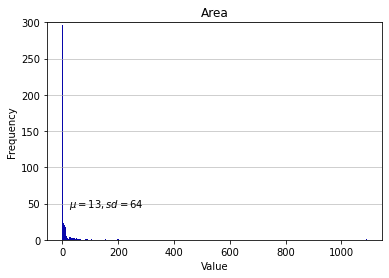

In [ ]:
import matplotlib.pyplot as plt

# Area is extremely skewed therefore, the journal suggest taking the log.
n, bins, patches = plt.hist(x=df['area'], bins='auto', color='#0504aa',
                            alpha=0.99, rwidth=0.99)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Area')
plt.text(23, 45, r'$\mu=13, sd=64$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#Taking the log of area
df['Log_area']=np.log10(df['area']+1)

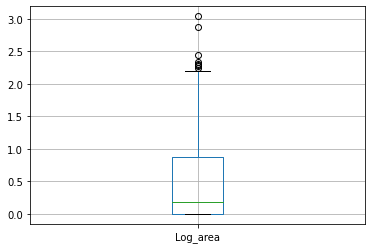

In [ ]:
df.boxplot(column=['Log_area'])

In [ ]:
df['Log_area']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.871573
513    1.742647
514    1.084934
515    0.000000
516    0.000000
Name: Log_area, Length: 517, dtype: float64

(0.0, 270.0)

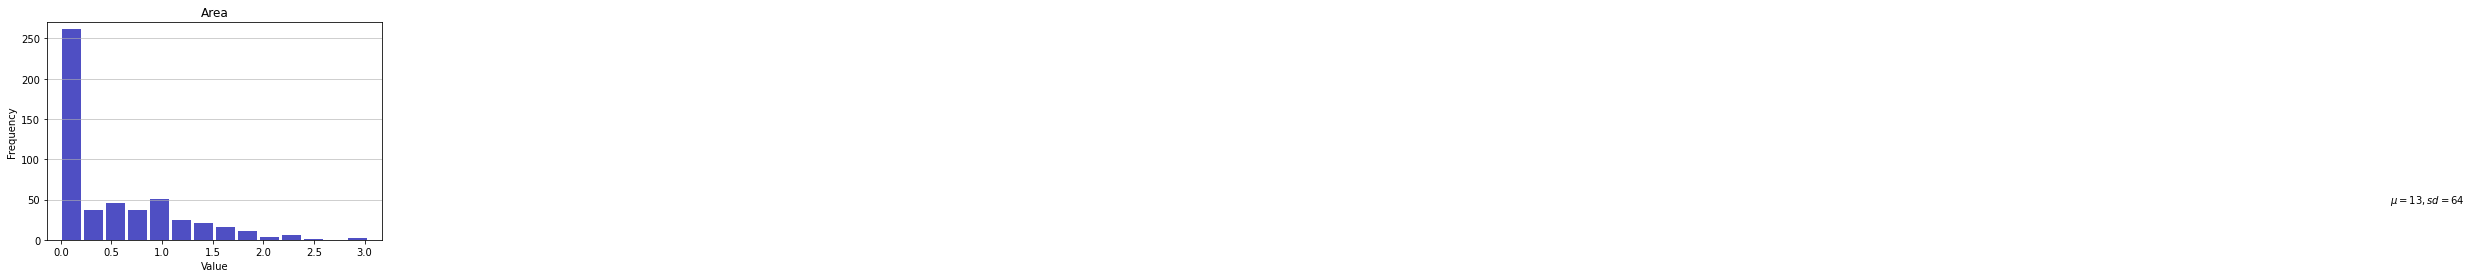

In [ ]:
# Area is extremely skewed therefore, the journal suggest taking the log.
# We can see a slight improvement from graph below
n, bins, patches = plt.hist(x=df['Log_area'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Area')
plt.text(23, 45, r'$\mu=13, sd=64$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

**Preprocessing: 1-of-C encoding**

In [ ]:
#Transformed categorical variables into a 1-of-C encoding
df = pd.get_dummies(df, columns=['month', 'day'])

**Preprocessing: All attributes standarised to a zero mean and one standard deviation**

In [ ]:
# Standardising the dataset for Neural Network and SVM models
scaled_features = StandardScaler().fit_transform(df.values)

# Creating back the dataframe of the scaled data
df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

**Same training/test splitting approach as used by the authors.**

In [ ]:
#Test set fraction
test_size = 0.1

#Select the features and target non standardized
features=df.drop(['area','Log_area'],axis=1)
target=df['Log_area']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

**Same set of features used by the authors**

In [ ]:
#ALL the features used and scaled for NN and SVM

#STFWI: Spatial, temporal, and Forest Weather Index
STFWI_train = X_train.drop(['temp', 'RH', 'wind', 'rain'],axis=1).copy()
STFWI_test = X_test.drop(['temp', 'RH', 'wind', 'rain'],axis=1).copy()

#STM: Spatial, temporal, and Meteorological
STM_train = X_train.drop(['FFMC', 'DMC', 'DC', 'ISI'],axis=1).copy()
STM_test = X_test.drop(['FFMC', 'DMC', 'DC', 'ISI'],axis=1).copy()

#FWI: Forest Weather index only
FWI_train = X_train[['FFMC', 'DMC', 'DC', 'ISI']].copy()
FWI_test = X_test[['FFMC', 'DMC', 'DC', 'ISI']].copy()

#M: Meteorological only
M_train = X_train[[ 'temp', 'RH', 'wind', 'rain']].copy()
M_test = X_test[['temp', 'RH', 'wind', 'rain']].copy()

**same classifier with exact parameter values.**

In [ ]:
#ALL the models used in the journal
nb = BayesianRidge(compute_score=True) # Naive-Bayes default
mr = LinearRegression() # Multiple-Regression default
dt = DecisionTreeRegressor() # Decision Tree Regressor
rf = RandomForestRegressor() # Random Forest default
nn = MLPRegressor() # Neural Network
svm = SVR(C=3, epsilon=0.2) # SVM Sequential Minimal Optimization algorithm default

##MODELS AND RMSE##

**Naive Bayes Model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate naive bayes for STFWI
nb_scores_STFWI = cross_val_score(nb, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nb_rmse_STFWI = np.sqrt(-nb_scores_STFWI)

# RMSE Calculation for Naive Bayes
print("\n\nAverage RMSE STFWI using naive_bayes")
print(mean(nb_rmse_STFWI))

#K-fold CV to evaluate naive bayes for STM
nb_scores_STM = cross_val_score(nb, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nb_rmse_STM = np.sqrt(-nb_scores_STM)

# RMSE Calculation for Naive Bayes
print("\n\nAverage RMSE STM using naive_bayes")
print(mean(nb_rmse_STM))

#K-fold CV to evaluate naive bayes for FWI
nb_scores_FWI = cross_val_score(nb, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nb_rmse_FWI = np.sqrt(-nb_scores_FWI)

# RMSE Calculation for Naive Bayes
print("\n\nAverage RMSE FWI using naive_bayes")
print(mean(nb_rmse_FWI))

#K-fold CV to evaluate naive bayes for M
nb_scores_M = cross_val_score(nb, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nb_rmse_M = np.sqrt(-nb_scores_M)

# RMSE Calculation for Naive Bayes
print("\n\nAverage RMSE M using naive_bayes")
print(mean(nb_rmse_M))



Average RMSE STFWI using naive_bayes
0.5997765311338857


Average RMSE STM using naive_bayes
0.600853941640458


Average RMSE FWI using naive_bayes
0.5997806582779842


Average RMSE M using naive_bayes
0.6008608519124788


**Multiple Linear Regression**

In [ ]:
#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate multiple linear regression for STFWI
mr_scores_STFWI = cross_val_score(mr, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mr_rmse_STFWI = np.sqrt(-mr_scores_STFWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STFWI")
print(mean(mr_rmse_STFWI))

#K-fold CV to evaluate multiple linear regression for STM
mr_scores_STM = cross_val_score(mr, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mr_rmse_STM = np.sqrt(-mr_scores_STM)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STM")
print(mean(mr_rmse_STM))

#K-fold CV to evaluate multiple linear regression for FWI
mr_scores_FWI = cross_val_score(mr, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mr_rmse_FWI = np.sqrt(-mr_scores_FWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE FWI")
print(mean(mr_rmse_FWI))

#K-fold CV to evaluate multiple linear regression for M
mr_scores_M = cross_val_score(mr, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

mr_rmse_M = np.sqrt(-mr_scores_M)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE M")
print(mean(mr_rmse_M))



Average RMSE STFWI
0.6050166920436294


Average RMSE STM
0.6137870473215896


Average RMSE FWI
0.5997519132259669


Average RMSE M
0.6118238372825663


**Decision tree**

In [ ]:
#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate multiple linear regression for STFWI
dt_scores_STFWI = cross_val_score(dt, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

dt_rmse_STFWI = np.sqrt(-dt_scores_STFWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STFWI")
print(mean(dt_rmse_STFWI))

#K-fold CV to evaluate multiple linear regression for STM
dt_scores_STM = cross_val_score(dt, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

dt_rmse_STM = np.sqrt(-dt_scores_STM)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STM")
print(mean(dt_rmse_STM))

#K-fold CV to evaluate multiple linear regression for FWI
dt_scores_FWI = cross_val_score(dt, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

dt_rmse_FWI = np.sqrt(-dt_scores_FWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE FWI")
print(mean(dt_rmse_FWI))

#K-fold CV to evaluate multiple linear regression for M
dt_scores_M = cross_val_score(dt, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

dt_rmse_M = np.sqrt(-dt_scores_M)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE M")
print(mean(dt_rmse_M))



Average RMSE STFWI
0.8074328938392267


Average RMSE STM
0.8246172280116983


Average RMSE FWI
0.7415710281579805


Average RMSE M
0.8673094600018606


**Random Forest Model**

In [ ]:
#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate multiple linear regression for STFWI
rf_scores_STFWI = cross_val_score(rf, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rf_rmse_STFWI = np.sqrt(-rf_scores_STFWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STFWI")
print(mean(rf_rmse_STFWI))

#K-fold CV to evaluate multiple linear regression for STM
rf_scores_STM = cross_val_score(rf, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rf_rmse_STM = np.sqrt(-rf_scores_STM)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STM")
print(mean(rf_rmse_STM))

#K-fold CV to evaluate multiple linear regression for FWI
rf_scores_FWI = cross_val_score(rf, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rf_rmse_FWI = np.sqrt(-rf_scores_FWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE FWI")
print(mean(rf_rmse_FWI))

#K-fold CV to evaluate multiple linear regression for M
rf_scores_M = cross_val_score(rf, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rf_rmse_M = np.sqrt(-rf_scores_M)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE M")
print(mean(rf_rmse_M))



Average RMSE STFWI
0.6423156385107376


Average RMSE STM
0.6111460507401134


Average RMSE FWI
0.6717668645844632


Average RMSE M
0.6417798449600991


**Neural Network Model**

In [ ]:
#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate multiple linear regression for STFWI
nn_scores_STFWI = cross_val_score(nn, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nn_rmse_STFWI = np.sqrt(-nn_scores_STFWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STFWI")
print(mean(nn_rmse_STFWI))

#K-fold CV to evaluate multiple linear regression for STM
nn_scores_STM = cross_val_score(nn, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nn_rmse_STM = np.sqrt(-nn_scores_STM)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STM")
print(mean(nn_rmse_STM))

#K-fold CV to evaluate multiple linear regression for FWI
nn_scores_FWI = cross_val_score(nn, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nn_rmse_FWI = np.sqrt(-nn_scores_FWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE FWI")
print(mean(nn_rmse_FWI))

#K-fold CV to evaluate multiple linear regression for M
nn_scores_M = cross_val_score(nn, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

nn_rmse_M = np.sqrt(-nn_scores_M)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE M")
print(mean(nn_rmse_M))



Average RMSE STFWI
0.7794371691311234


Average RMSE STM
0.6216340175606444


Average RMSE FWI
0.7032196201269707


Average RMSE M
0.6276937074247005


**Support Vector Machine Model**

In [ ]:
#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#K-fold CV to evaluate multiple linear regression for STFWI
svm_scores_STFWI = cross_val_score(svm, STFWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

svm_rmse_STFWI = np.sqrt(-svm_scores_STFWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STFWI")
print(mean(svm_rmse_STFWI))

#K-fold CV to evaluate multiple linear regression for STM
svm_scores_STM = cross_val_score(svm, STM_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

svm_rmse_STM = np.sqrt(-svm_scores_STM)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE STM")
print(mean(svm_rmse_STM))

#K-fold CV to evaluate multiple linear regression for FWI
svm_scores_FWI = cross_val_score(svm, FWI_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

svm_rmse_FWI = np.sqrt(-svm_scores_FWI)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE FWI")
print(mean(svm_rmse_FWI))

#K-fold CV to evaluate multiple linear regression for M
svm_scores_M = cross_val_score(svm, M_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

svm_rmse_M = np.sqrt(-svm_scores_M)

# RMSE Calculation for multiple linear regression
print("\n\nAverage RMSE M")
print(mean(svm_rmse_M))



Average RMSE STFWI
0.650380828990238


Average RMSE STM
0.6298718725500658


Average RMSE FWI
0.6489701225295974


Average RMSE M
0.6264789474086352


**Postprocessing**

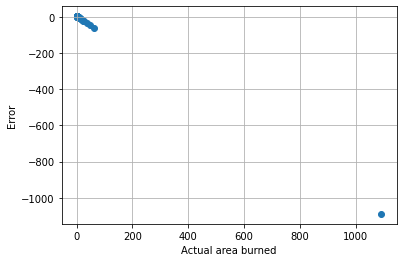

In [ ]:
import matplotlib.pyplot as plt
# Naive Bayes Regressor STFWI

# Training using Naive Bayes Regressor
nb.fit(STFWI_train, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_one = nb.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_nb_one.reshape(predictions_nb_one.size,))-10**(y_test))

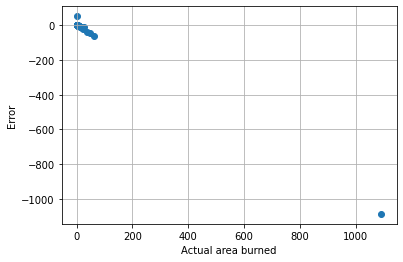

In [ ]:
import matplotlib.pyplot as plt
# Multiple Regressor STFWI

# Training Regressor
mr.fit(STFWI_train, y_train)
# Testing Regressor
predictions_mr_one = mr.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_mr_one.reshape(predictions_mr_one.size,))-10**(y_test))

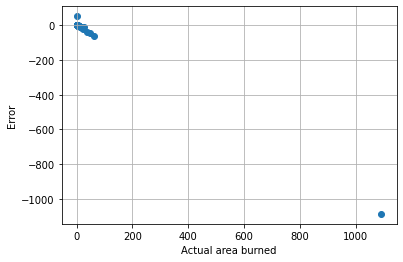

In [ ]:
import matplotlib.pyplot as plt
#Decision Tree Regressor STFWI

# Training Regressor
dt.fit(STFWI_train, y_train)
# Testing Regressor
predictions_dt_one = mr.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_dt_one.reshape(predictions_dt_one.size,))-10**(y_test))

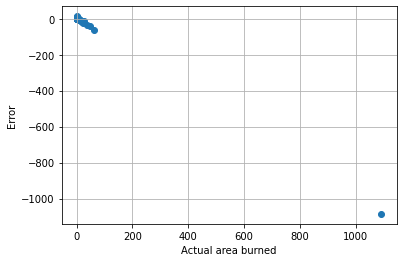

In [ ]:
import matplotlib.pyplot as plt
#Random Forest Regressor STFWI

# Training Regressor
rf.fit(STFWI_train, y_train)
# Testing Regressor
predictions_rf_one = rf.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_rf_one.reshape(predictions_rf_one.size,))-10**(y_test))

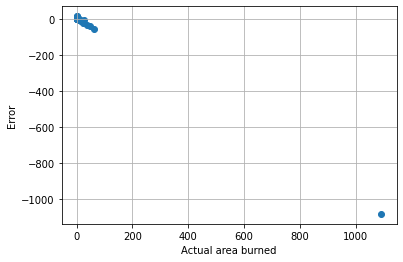

In [ ]:
import matplotlib.pyplot as plt
#Neural Network Regressor STFWI

# Training Regressor
nn.fit(STFWI_train, y_train)
# Testing Regressor
predictions_nn_one = nn.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_nn_one.reshape(predictions_nn_one.size,))-10**(y_test))

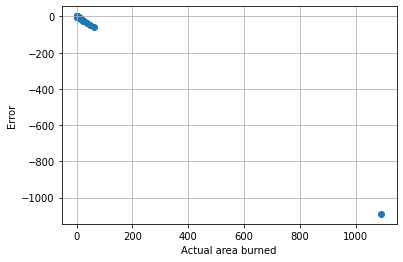

In [ ]:
import matplotlib.pyplot as plt
#SVM Regressor STFWI

# Training Regressor
svm.fit(STFWI_train, y_train)
# Testing Regressor
predictions_svm_one = svm.predict(STFWI_test)

plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(predictions_svm_one.reshape(predictions_svm_one.size,))-10**(y_test))

**Task 2**

Design and develop your own ML solution for this problem.

**Features Selection**

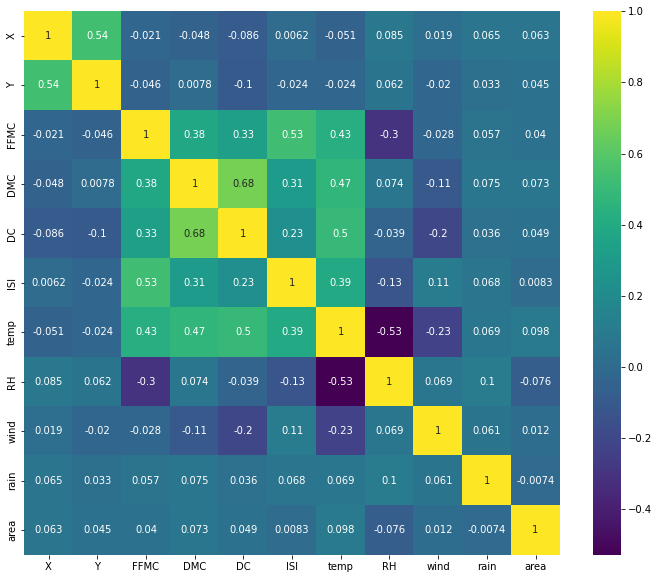

In [ ]:
import seaborn as sns

#Load forest fire dataset
df = pd.read_csv('/content/forestfires.csv')

#First method of feature importance using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.viridis)
plt.savefig('correlation.pdf')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

#Set cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),loss='exponential',learning_rate=0.01)
ada_scores = cross_val_score(reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# RMSE Calculation regression
ada_rmse = np.sqrt(-ada_scores)

# Average RMSE Calculation regression
print("\n\nAverage RMSE")
print(mean(ada_rmse))



Average RMSE
0.5989795662357938
